In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski

In [2]:
def colfilt(image, window_size, fun):
    # Get the size of the image
    height, width = image.shape

    # Get the size of the window
    window_height, window_width = window_size

    # Create a new image to store the result
    result = np.zeros((height, width))

    # Iterate over the image
    for y in range(height):
        for x in range(width):
            # Get the window
            window = image[max(y - window_height // 2, 0):min(y + window_height // 2 + 1, height),
                           max(x - window_width // 2, 0):min(x + window_width // 2 + 1, width)]

            # Apply the function
            result[y, x] = fun(window)

    return result

In [3]:
img = ski.io.imread(r'../images/eight.tif', as_gray=True) / 255.0
img_salt = ski.io.imread(r'../images/eight_salt.jpg', as_gray=True) / 255.0
img_pepper = ski.io.imread(r'../images/eight_pepper.jpg', as_gray=True) / 255.0

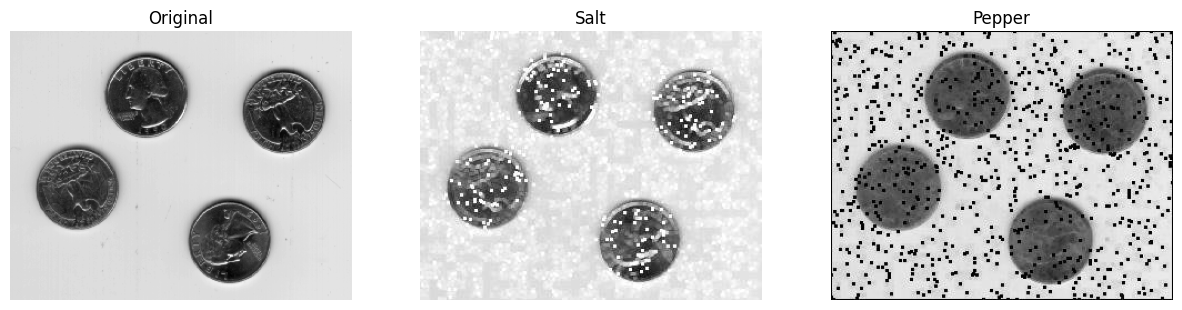

In [4]:
_, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, im, title in zip(axs, [img, img_salt, img_pepper], ['Original', 'Salt', 'Pepper']):
    ax.imshow(im, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.show()

In [5]:
img_fix_1_salt = colfilt(img_salt, (3, 3), np.min)
img_fix_2_pepper = colfilt(img_pepper, (3, 3), np.max)
img_fix_3 = colfilt(img_salt, (3, 3), np.max)


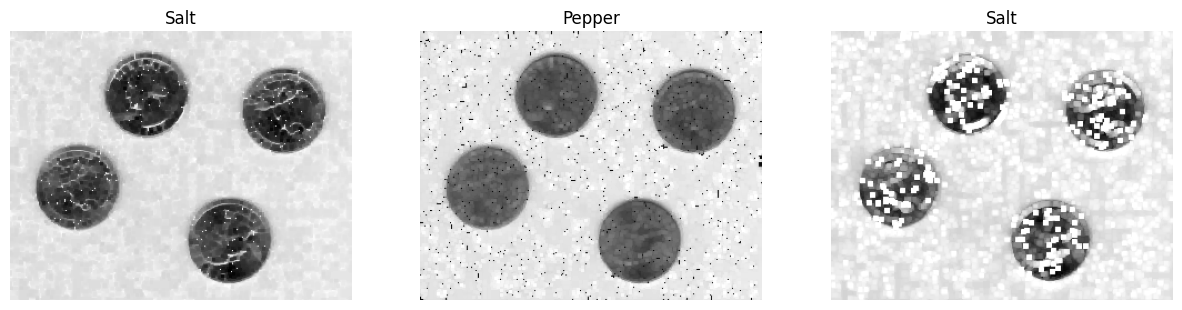

In [6]:
_, axs = plt.subplots(1, 3, figsize=(15, 5))
for  ax, im, title in zip(axs, [img_fix_1_salt, img_fix_2_pepper, img_fix_3], ['Salt', 'Pepper', 'Salt']):
    ax.imshow(im, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()